# Homework 9

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import scipy.stats as st

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.stats.diagnostic import acorr_ljungbox

from statsmodels.tsa.holtwinters import ExponentialSmoothing

plt.rcParams['figure.figsize'] = (10, 8)

In [49]:
data = pd.read_csv('../../homework_data/sem_10/ugnivenko.va.csv', header = None)
data.head(5)

,0
0,0.239899
1,1.137586
2,1.162339
3,2.279059
4,3.517741


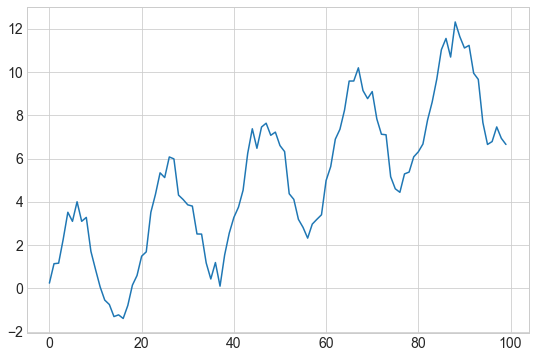

In [50]:
plt.rcParams['figure.figsize'] = (9.0, 6.0)
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 14})
plt.plot(data.values)

# Найдите период временного ряда 

В общем, периодическая зависимость может быть формально определена как корреляционная зависимость порядка k между каждым i-м элементом ряда и (i-k)-м элементом. Ее можно измерить с помощью автокорреляции (т.е. корреляции между самими членами ряда); k обычно называют лагом (иногда используют эквивалентные термины: сдвиг, запаздывание). Если ошибка измерения не слишком большая, то сезонность можно определить визуально, рассматривая поведение членов ряда через каждые k временных единиц.

Автокорреляционная коррелограмма. Сезонные составляющие временного ряда могут быть найдены с помощью коррелограммы. Коррелограмма (автокоррелограмма) показывает численно и графически автокорреляционную функцию (AКФ), иными словами коэффициенты автокорреляции (и их стандартные ошибки) для последовательности лагов из определенного диапазона.

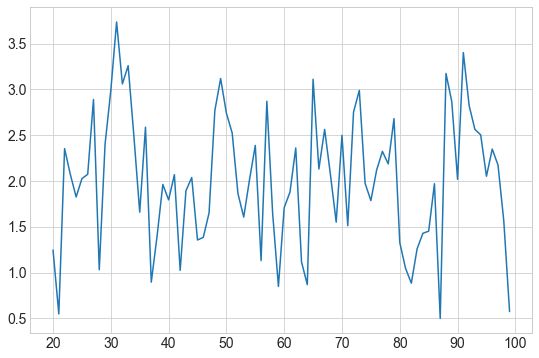

In [51]:
data_d = data.diff(20)
plt.plot(data_d)

нет периодичности 

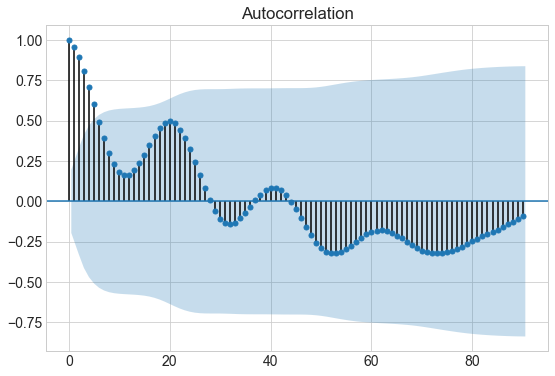

In [52]:
plot_acf(data.values, lags=90)

plt.show()

T = 20

# Значение статистики KPSS для остатков в разложение seaconal_decompose где период указан с предыдущего пункта.

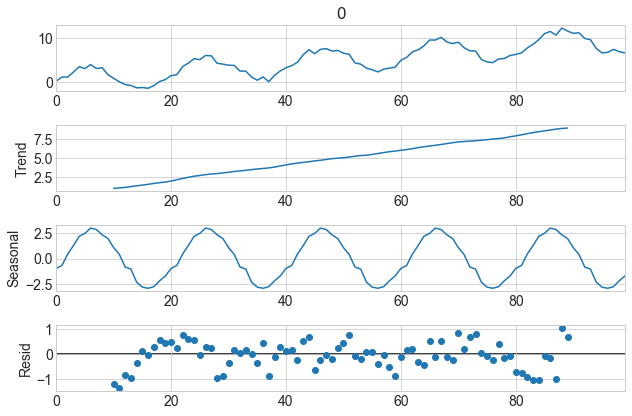

In [56]:
stl_data = seasonal_decompose(data[0], period = 20)
_= stl_data.plot()

In [57]:
resid = stl_data.resid.dropna()

In [58]:
kpss(resid, nlags='legacy')

/Users/vitalijugnivenko/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.080764395276127,
 0.1,
 12,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

kpss_stat = 0.080764395276127